In [32]:
import numpy as np

def gaussian_elimination(A, b):
    n = len(A)
    aug = np.hstack((A, b.reshape(-1, 1))).astype(float)
    # Forward Elimination
    for i in range(n):
        pivot = aug[i, i]
        if pivot == 0:
            for k in range(i+1, n):
                if aug[k, i] != 0:
                    aug[[i, k]] = aug[[k, i]]
                    pivot = aug[i, i]
                    break
            else:
                raise ValueError("Matrix is singular.")
        for j in range(i+1, n):
            m = aug[j, i] / pivot
            aug[j] -= m * aug[i]
    # Back Substitution
    x = np.zeros(n)
    for i in range(n-1, -1, -1):
        x[i] = (aug[i, -1] - np.dot(aug[i, i+1:n], x[i+1:n])) / aug[i, i]
    return x

# System of equations
A = np.array([[3, 1, -2],
              [2, -2, 4],
              [-1, 12, -1]], dtype=float)
b = np.array([1, -2, 0], dtype=float)

solution_ge = gaussian_elimination(A, b)
print("Gaussian Elimination Solution:", solution_ge)

Gaussian Elimination Solution: [ 0.         -0.04347826 -0.52173913]


In [34]:
import numpy as np

def jacobi_method(A, b, x0=None, tol=1e-6, max_iter=100):

    n = len(b)

    # Check for zero diagonal elements
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError(f"Zero diagonal element at position {i}. Jacobi method cannot proceed.")

    # Initial guess
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    # Iteration variables
    iterations = 0
    residual_history = []

    # Extract diagonal elements
    D = np.diag(np.diag(A))
    R = A - D

    # Jacobi iteration
    while iterations < max_iter:
        x_old = x.copy()

        # Update x using the Jacobi formula: x = D^(-1) * (b - R*x)
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x_old[j]
            x[i] = (b[i] - sigma) / A[i, i]

        # Calculate residual
        residual = np.linalg.norm(A @ x - b)
        residual_history.append(residual)

        # Check convergence
        if np.linalg.norm(x - x_old) < tol:
            break

        iterations += 1

    return x, iterations, residual_history


def gauss_seidel_method(A, b, x0=None, tol=1e-6, max_iter=100):

    n = len(b)

    # Check for zero diagonal elements
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError(f"Zero diagonal element at position {i}. Gauss-Seidel method cannot proceed.")

    # Initial guess
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    # Iteration variables
    iterations = 0
    residual_history = []

    # Gauss-Seidel iteration
    while iterations < max_iter:
        x_old = x.copy()

        # Update x using the Gauss-Seidel formula
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x[j]  # Use updated values immediately
            x[i] = (b[i] - sigma) / A[i, i]

        # Calculate residual
        residual = np.linalg.norm(A @ x - b)
        residual_history.append(residual)

        # Check convergence
        if np.linalg.norm(x - x_old) < tol:
            break

        iterations += 1

    return x, iterations, residual_history

In [37]:
import numpy as np
import time

# Define the system of equations
A = np.array([
    [3, 1, -2],
    [2, -2, 4],
    [-1, 12, -1]
])

b = np.array([1, -2, 0])

# Initial guess
x0 = np.zeros(3)

# Solve using Jacobi method
try:
    start_time = time.time()
    jacobi_solution, jacobi_iterations, jacobi_residuals = jacobi_method(A, b, x0, tol=1e-6, max_iter=100)
    jacobi_time = time.time() - start_time

    print("Solution using Jacobi Method:")
    print(f"x = {jacobi_solution[0]:.6f}")
    print(f"y = {jacobi_solution[1]:.6f}")
    print(f"z = {jacobi_solution[2]:.6f}")
    print(f"Iterations: {jacobi_iterations}")
    print(f"Time taken: {jacobi_time:.6f} seconds")

    # Verify the solution
    residuals = A @ jacobi_solution - b
    print("\nResiduals (should be close to zero):")
    print(residuals)
    print(f"Sum of absolute residuals: {np.sum(np.abs(residuals)):.10f}")

except ValueError as e:
    print(f"Error in Jacobi method: {e}")

print("\n" + "-"*50 + "\n")

# Solve using Gauss-Seidel method
try:
    start_time = time.time()
    gs_solution, gs_iterations, gs_residuals = gauss_seidel_method(A, b, x0, tol=1e-6, max_iter=100)
    gs_time = time.time() - start_time

    print("Solution using Gauss-Seidel Method:")
    print(f"x = {gs_solution[0]:.6f}")
    print(f"y = {gs_solution[1]:.6f}")
    print(f"z = {gs_solution[2]:.6f}")
    print(f"Iterations: {gs_iterations}")
    print(f"Time taken: {gs_time:.6f} seconds")

    # Verify the solution
    residuals = A @ gs_solution - b
    print("\nResiduals (should be close to zero):")
    print(residuals)
    print(f"Sum of absolute residuals: {np.sum(np.abs(residuals)):.10f}")

except ValueError as e:
    print(f"Error in Gauss-Seidel method: {e}")

Solution using Jacobi Method:
x = 152037631471235787279170060043344368399862504976157604200389908889600.000000
y = 609249400623943066746320893886785503457799604761999743285360026714112.000000
z = 1439937617137894804434883223145369737036781708505748756630518781444096.000000
Iterations: 100
Time taken: 0.007468 seconds

Residuals (should be close to zero):
[-1.81451294e+69  4.84532693e+69  5.71901756e+69]
Sum of absolute residuals: 12378857428362489808880535780326095361012656983198616323892066488680448.0000000000

--------------------------------------------------

Solution using Gauss-Seidel Method:
x = 1574640304958144207361292941958555174996325193539543824347174316819564493671883899795642271322081354484542506980229080273361143162959461709030359040.000000
y = 6508362969162576616780929997946205116457246623702464598957317882148218541431750454294624175144538715220723581934607490819491343509282119412441153536.000000
z = 7652571532499277004793491474516352684495390852132667778511342837144349

Comparative Analysis of Methods
--------------------------------------------------------------------------------
Method               Iterations   Time (s)     Residual     Solution
--------------------------------------------------------------------------------
Gaussian Elimination 1            0.000186     3.330669e-16 x=0.0000, y=-0.0435, z=-0.5217
Jacobi Method        100          0.003909     7.712121e+69 x=152037631471235787279170060043344368399862504976157604200389908889600.0000, y=609249400623943066746320893886785503457799604761999743285360026714112.0000, z=1439937617137894804434883223145369737036781708505748756630518781444096.0000
Gauss-Seidel Method  100          0.004002     3.284328e+149 x=1574640304958144207361292941958555174996325193539543824347174316819564493671883899795642271322081354484542506980229080273361143162959461709030359040.0000, y=650836296916257661678092999794620511645724662370246459895731788214821854143175045429462417514453871522072358193460749081949134350928

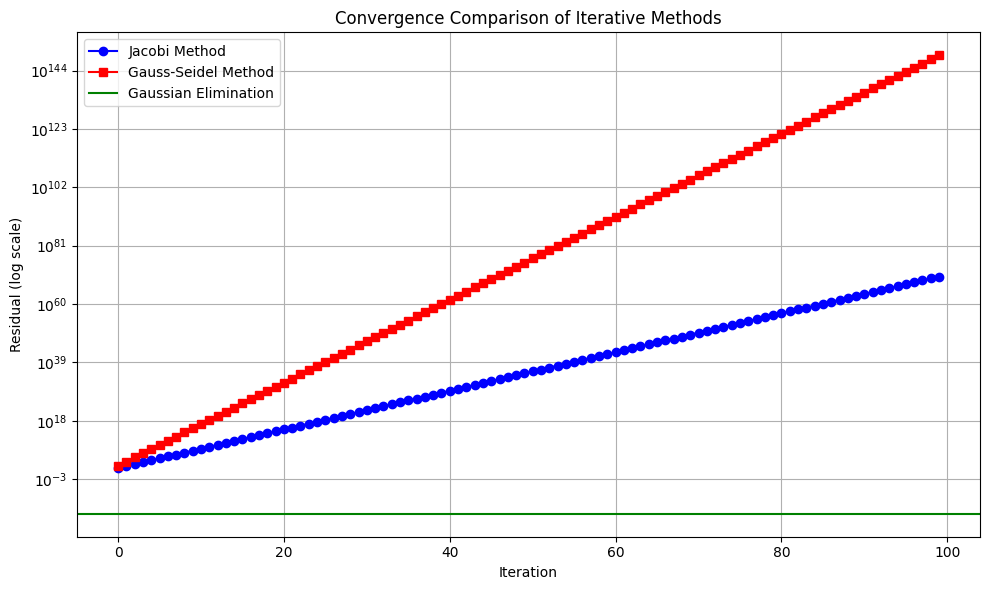


Advantages and Disadvantages:

1. Gaussian Elimination:
   Advantages: Direct method, typically fast for small systems, provides exact solution
   Disadvantages: Higher computational complexity (O(n³)), less efficient for large systems,
                  susceptible to round-off errors, requires complete matrix recalculation for changes

2. Jacobi Method:
   Advantages: Simple to implement, parallelizable, works well for diagonally dominant matrices
   Disadvantages: Generally slower convergence, may not converge for all matrices,
                  requires more iterations than Gauss-Seidel

3. Gauss-Seidel Method:
   Advantages: Faster convergence than Jacobi, uses less memory, good for sparse matrices
   Disadvantages: Less parallelizable, may still not converge for all matrices,
                  still iterative and potentially slower than direct methods for small systems


In [38]:
import numpy as np
import time
import matplotlib.pyplot as plt

# Define the system of equations
A = np.array([
    [3, 1, -2],
    [2, -2, 4],
    [-1, 12, -1]
])

b = np.array([1, -2, 0])

# Initial guess for iterative methods
x0 = np.zeros(3)

# Comparative analysis
methods = []
solutions = []
iterations_list = []
times = []
residuals_list = []

# 1. Gaussian Elimination
try:
    start_time = time.time()
    ge_solution = gaussian_elimination(A, b)
    ge_time = time.time() - start_time

    methods.append("Gaussian Elimination")
    solutions.append(ge_solution)
    iterations_list.append(1)  # Direct method, only 1 "iteration"
    times.append(ge_time)
    residuals_list.append(np.linalg.norm(A @ ge_solution - b))

except ValueError as e:
    print(f"Error in Gaussian Elimination: {e}")

# 2. Jacobi Method
try:
    start_time = time.time()
    jacobi_solution, jacobi_iterations, jacobi_residuals = jacobi_method(A, b, x0, tol=1e-6, max_iter=100)
    jacobi_time = time.time() - start_time

    methods.append("Jacobi Method")
    solutions.append(jacobi_solution)
    iterations_list.append(jacobi_iterations)
    times.append(jacobi_time)
    residuals_list.append(np.linalg.norm(A @ jacobi_solution - b))

except ValueError as e:
    print(f"Error in Jacobi method: {e}")

# 3. Gauss-Seidel Method
try:
    start_time = time.time()
    gs_solution, gs_iterations, gs_residuals = gauss_seidel_method(A, b, x0, tol=1e-6, max_iter=100)
    gs_time = time.time() - start_time

    methods.append("Gauss-Seidel Method")
    solutions.append(gs_solution)
    iterations_list.append(gs_iterations)
    times.append(gs_time)
    residuals_list.append(np.linalg.norm(A @ gs_solution - b))

except ValueError as e:
    print(f"Error in Gauss-Seidel method: {e}")

# Print comparison table
print("Comparative Analysis of Methods")
print("-" * 80)
print(f"{'Method':<20} {'Iterations':<12} {'Time (s)':<12} {'Residual':<12} {'Solution'}")
print("-" * 80)

for i, method in enumerate(methods):
    sol_str = f"x={solutions[i][0]:.4f}, y={solutions[i][1]:.4f}, z={solutions[i][2]:.4f}"
    print(f"{method:<20} {iterations_list[i]:<12} {times[i]:<12.6f} {residuals_list[i]:<12.6e} {sol_str}")

# Plot convergence for iterative methods
plt.figure(figsize=(10, 6))

if len(jacobi_residuals) > 0:
    plt.semilogy(range(len(jacobi_residuals)), jacobi_residuals, 'b-o', label='Jacobi Method')

if len(gs_residuals) > 0:
    plt.semilogy(range(len(gs_residuals)), gs_residuals, 'r-s', label='Gauss-Seidel Method')

plt.xlabel('Iteration')
plt.ylabel('Residual (log scale)')
plt.title('Convergence Comparison of Iterative Methods')
plt.grid(True)
plt.legend()
plt.tight_layout()

# Add a horizontal line for Gaussian Elimination residual
if len(residuals_list) > 0 and "Gaussian Elimination" in methods:
    ge_idx = methods.index("Gaussian Elimination")
    plt.axhline(y=residuals_list[ge_idx], color='g', linestyle='-', label='Gaussian Elimination')
    plt.legend()

plt.show()

print("\nAdvantages and Disadvantages:")
print("\n1. Gaussian Elimination:")
print("   Advantages: Direct method, typically fast for small systems, provides exact solution")
print("   Disadvantages: Higher computational complexity (O(n³)), less efficient for large systems,")
print("                  susceptible to round-off errors, requires complete matrix recalculation for changes")

print("\n2. Jacobi Method:")
print("   Advantages: Simple to implement, parallelizable, works well for diagonally dominant matrices")
print("   Disadvantages: Generally slower convergence, may not converge for all matrices,")
print("                  requires more iterations than Gauss-Seidel")

print("\n3. Gauss-Seidel Method:")
print("   Advantages: Faster convergence than Jacobi, uses less memory, good for sparse matrices")
print("   Disadvantages: Less parallelizable, may still not converge for all matrices,")
print("                  still iterative and potentially slower than direct methods for small systems")

Exact solution (for verification):
x = 1.527273
y = 0.400000
z = 1.054545

Matrix is diagonally dominant: False
Note: Diagonal dominance generally ensures convergence of iterative methods.

--------------------------------------------------
Jacobi Method:
Solution: x = 1.527272, y = 0.400000, z = 1.054546
Iterations: 25
Time taken: 0.001540 seconds
Final residual: 2.201831e-06
Difference from exact solution: 5.812493e-07
--------------------------------------------------
Gauss-Seidel Method:
Solution: x = 1.527273, y = 0.400000, z = 1.054545
Iterations: 11
Time taken: 0.000708 seconds
Final residual: 1.014150e-06
Difference from exact solution: 1.812592e-07
--------------------------------------------------
Comparison:
Jacobi iterations: 25
Gauss-Seidel iterations: 11
Iteration reduction: 14 (56.0%)


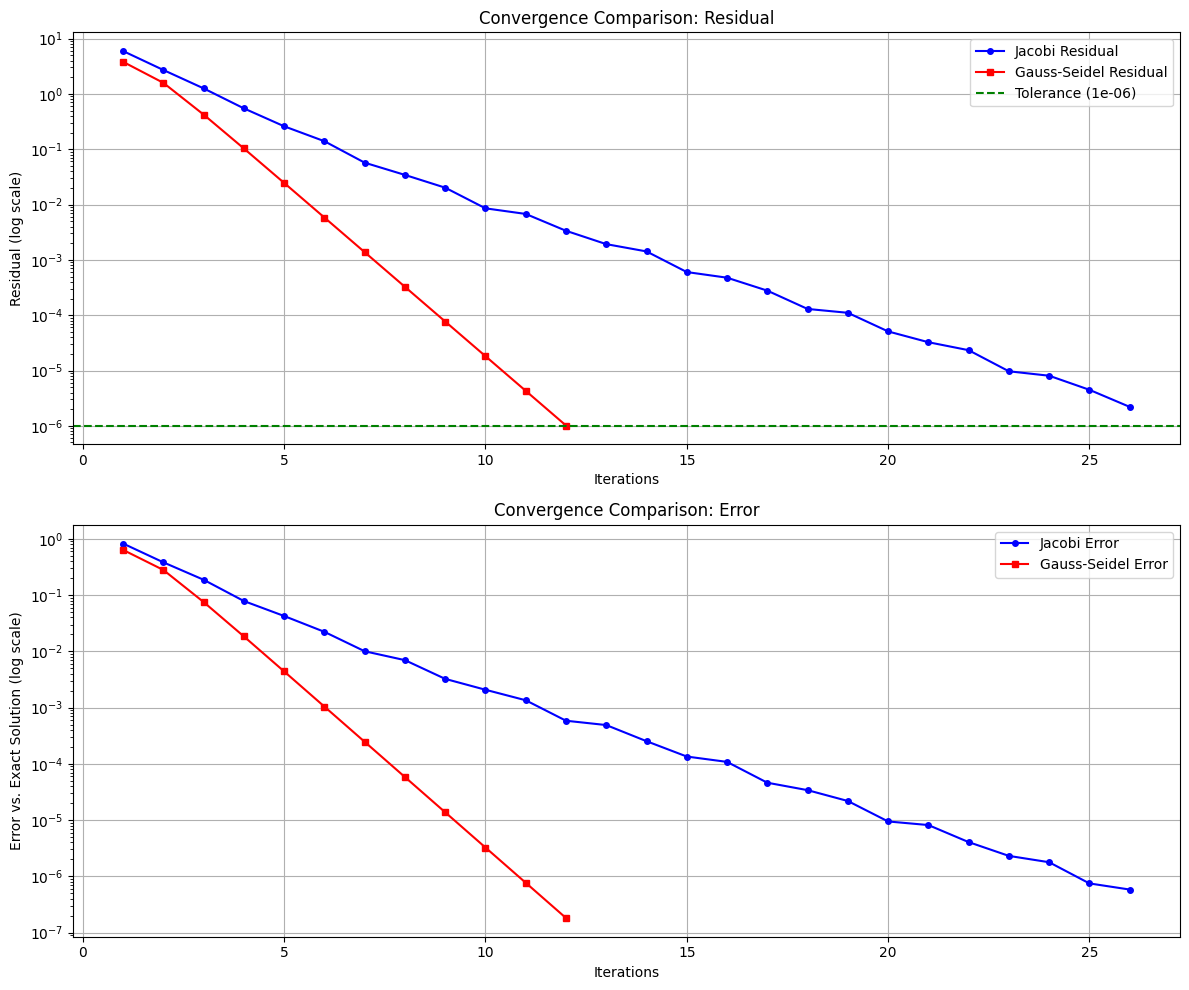


Comparative Analysis of Methods
--------------------------------------------------------------------------------
Method          Iterations   Time (s)     Final Residual     Error vs Exact
--------------------------------------------------------------------------------
Jacobi          25           0.001540     2.201831e-06       5.812493e-07
Gauss-Seidel    11           0.000708     1.014150e-06       1.812592e-07


In [41]:
import numpy as np
import matplotlib.pyplot as plt
import time

# Define the system: Ax = b
A = np.array([
    [5, -2, 3],
    [2, 5, -1],
    [1, 3, 5]
])

b = np.array([10, 4, 8])

# For verification, calculate the exact solution using numpy's linear algebra solver
exact_solution = np.linalg.solve(A, b)
print("Exact solution (for verification):")
print(f"x = {exact_solution[0]:.6f}")
print(f"y = {exact_solution[1]:.6f}")
print(f"z = {exact_solution[2]:.6f}")

# Check if matrix is diagonally dominant (helps with convergence analysis)
diag_dominant = True
for i in range(len(A)):
    if abs(A[i, i]) <= sum(abs(A[i, j]) for j in range(len(A)) if j != i):
        diag_dominant = False
        break

print(f"\nMatrix is diagonally dominant: {diag_dominant}")
print("Note: Diagonal dominance generally ensures convergence of iterative methods.\n")

def jacobi_method(A, b, x0=None, tol=1e-6, max_iter=1000):

    n = len(b)

    # Check for zero diagonal elements
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError(f"Zero diagonal element at position {i}. Jacobi method cannot proceed.")

    # Initial guess
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    # Iteration variables
    iterations = 0
    residual_history = []
    error_history = []  # Track difference from exact solution

    # Extract diagonal elements
    D = np.diag(np.diag(A))
    R = A - D

    # Jacobi iteration
    while iterations < max_iter:
        x_old = x.copy()

        # Update x using the Jacobi formula: x = D^(-1) * (b - R*x)
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x_old[j]
            x[i] = (b[i] - sigma) / A[i, i]

        # Calculate residual
        residual = np.linalg.norm(A @ x - b)
        residual_history.append(residual)

        # Calculate error compared to exact solution
        error = np.linalg.norm(x - exact_solution)
        error_history.append(error)

        # Check convergence
        if np.linalg.norm(x - x_old) < tol:
            break

        iterations += 1

    return x, iterations, residual_history, error_history


def gauss_seidel_method(A, b, x0=None, tol=1e-6, max_iter=1000):
    n = len(b)

    # Check for zero diagonal elements
    for i in range(n):
        if abs(A[i, i]) < 1e-10:
            raise ValueError(f"Zero diagonal element at position {i}. Gauss-Seidel method cannot proceed.")

    # Initial guess
    if x0 is None:
        x = np.zeros(n)
    else:
        x = x0.copy()

    # Iteration variables
    iterations = 0
    residual_history = []
    error_history = []  # Track difference from exact solution

    # Gauss-Seidel iteration
    while iterations < max_iter:
        x_old = x.copy()

        # Update x using the Gauss-Seidel formula
        for i in range(n):
            sigma = 0
            for j in range(n):
                if j != i:
                    sigma += A[i, j] * x[j]  # Use updated values immediately
            x[i] = (b[i] - sigma) / A[i, i]

        # Calculate residual
        residual = np.linalg.norm(A @ x - b)
        residual_history.append(residual)

        # Calculate error compared to exact solution
        error = np.linalg.norm(x - exact_solution)
        error_history.append(error)

        # Check convergence
        if np.linalg.norm(x - x_old) < tol:
            break

        iterations += 1

    return x, iterations, residual_history, error_history


# Initial guess
x0 = np.zeros(3)

# Tolerance
tol = 1e-6

# Solve using Jacobi method
print("-" * 50)
print("Jacobi Method:")
start_time = time.time()
jacobi_solution, jacobi_iterations, jacobi_residuals, jacobi_errors = jacobi_method(A, b, x0, tol=tol)
jacobi_time = time.time() - start_time

print(f"Solution: x = {jacobi_solution[0]:.6f}, y = {jacobi_solution[1]:.6f}, z = {jacobi_solution[2]:.6f}")
print(f"Iterations: {jacobi_iterations}")
print(f"Time taken: {jacobi_time:.6f} seconds")
print(f"Final residual: {jacobi_residuals[-1]:.6e}")
print(f"Difference from exact solution: {np.linalg.norm(jacobi_solution - exact_solution):.6e}")

# Solve using Gauss-Seidel method
print("-" * 50)
print("Gauss-Seidel Method:")
start_time = time.time()
gs_solution, gs_iterations, gs_residuals, gs_errors = gauss_seidel_method(A, b, x0, tol=tol)
gs_time = time.time() - start_time

print(f"Solution: x = {gs_solution[0]:.6f}, y = {gs_solution[1]:.6f}, z = {gs_solution[2]:.6f}")
print(f"Iterations: {gs_iterations}")
print(f"Time taken: {gs_time:.6f} seconds")
print(f"Final residual: {gs_residuals[-1]:.6e}")
print(f"Difference from exact solution: {np.linalg.norm(gs_solution - exact_solution):.6e}")

# Comparison
print("-" * 50)
print("Comparison:")
print(f"Jacobi iterations: {jacobi_iterations}")
print(f"Gauss-Seidel iterations: {gs_iterations}")
print(f"Iteration reduction: {jacobi_iterations - gs_iterations} ({(jacobi_iterations - gs_iterations)/jacobi_iterations*100:.1f}%)")

# Plot convergence
plt.figure(figsize=(12, 10))

# Plot 1: Residual convergence (log scale)
plt.subplot(2, 1, 1)
plt.semilogy(range(1, len(jacobi_residuals)+1), jacobi_residuals, 'b-o', label='Jacobi Residual', markersize=4)
plt.semilogy(range(1, len(gs_residuals)+1), gs_residuals, 'r-s', label='Gauss-Seidel Residual', markersize=4)
plt.axhline(y=tol, color='g', linestyle='--', label=f'Tolerance ({tol})')
plt.xlabel('Iterations')
plt.ylabel('Residual (log scale)')
plt.title('Convergence Comparison: Residual')
plt.grid(True)
plt.legend()

# Plot 2: Error convergence (log scale)
plt.subplot(2, 1, 2)
plt.semilogy(range(1, len(jacobi_errors)+1), jacobi_errors, 'b-o', label='Jacobi Error', markersize=4)
plt.semilogy(range(1, len(gs_errors)+1), gs_errors, 'r-s', label='Gauss-Seidel Error', markersize=4)
plt.xlabel('Iterations')
plt.ylabel('Error vs. Exact Solution (log scale)')
plt.title('Convergence Comparison: Error')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

# Print comparison table
print("\nComparative Analysis of Methods")
print("-" * 80)
print(f"{'Method':<15} {'Iterations':<12} {'Time (s)':<12} {'Final Residual':<18} {'Error vs Exact'}")
print("-" * 80)
print(f"{'Jacobi':<15} {jacobi_iterations:<12} {jacobi_time:<12.6f} {jacobi_residuals[-1]:<18.6e} {np.linalg.norm(jacobi_solution - exact_solution):.6e}")
print(f"{'Gauss-Seidel':<15} {gs_iterations:<12} {gs_time:<12.6f} {gs_residuals[-1]:<18.6e} {np.linalg.norm(gs_solution - exact_solution):.6e}")